In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyPI as pi
import cv2

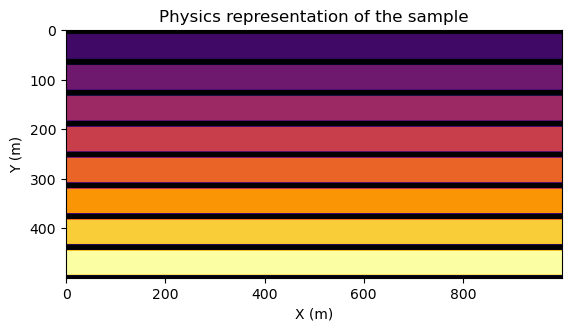

In [2]:
sample, sample_image, X, Y = pi.initialize_environment()
# Definir posiciones fijas para las líneas horizontales (en píxeles)
'''
fixed_positions = [100, 250, 400]  # Posiciones en el eje y

# Definir matrices específicas para cada línea en sample
line_matrices = [
    pi.jones_matrix(np.pi, np.pi/2),        # Línea 1
    pi.jones_matrix(np.pi/3, 0),      # Línea 2
    pi.jones_matrix(np.pi/3, np.pi/2)       # Línea 3
]
'''
n  = 8
# Parámetros


# Crear las matrices con el segundo valor variando de 0 a π (0, π/8, π/6,...)
angles = [0, np.pi/8, np.pi/6, np.pi/4, np.pi/3, np.pi/2, np.pi, 2*np.pi]
#angles = np.linspace(0, 2 * np.pi, n)
line_matrices = [pi.jones_matrix(np.pi/2, angle) for angle in angles]
fixed_positions = np.arange(10, 500, 500//n)  # Posiciones en incrementos regulares
#fixed_positions = np.arange(10, 500, 20)  # Posiciones en incrementos regulares
#fixed_positions = np.arange(1, 500, 1)  # Posiciones en incrementos regulares


sample = pi.add_lines(fixed_positions, line_matrices, sample_image, sample, grosor=50)

In [3]:
Eis = pi.polarization_basis_set('L')
Er = pi.polarization_basis_set('L')

I, info,E_r, E_s = pi.sample_intensity(Er, Eis, sample, X, Y)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

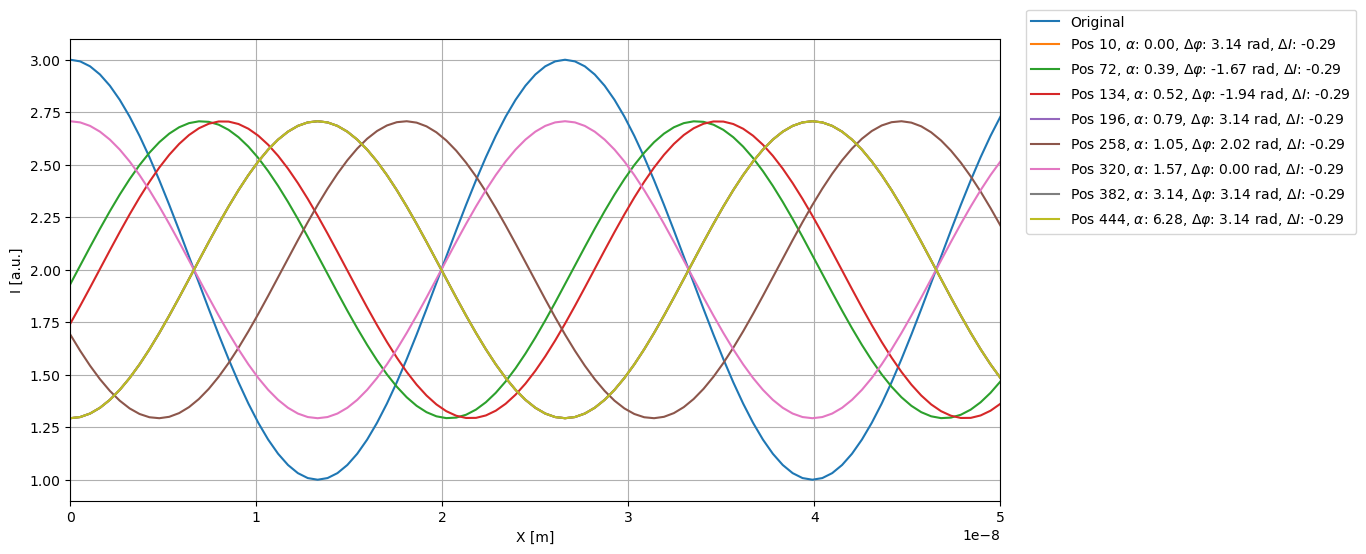

In [ ]:
# Aumentar el tamaño de la figura para mejor visualización
plt.figure(figsize=(12, 6))

# Arreglos para almacenar desfases y cambios en la intensidad
desfases = []
cambios_intensidad = []

# Graficar la curva original
plt.plot(X[0], I[0], label="Original")

# Calcular el desfase y el cambio en la intensidad
for i, pos in enumerate(fixed_positions):
    # Cálculo del desfase con la nueva función
    desfase = pi.calcular_desfase(I[0], I[pos], X[0])
    
    # Cálculo del cambio en la intensidad
    cambio_intensidad = np.max(I[pos]) - np.max(I[0])
    
    # Guardar en los arreglos
    desfases.append(desfase)
    cambios_intensidad.append(cambio_intensidad)
    
    # Graficar cada curva con la leyenda correspondiente
    plt.plot(X[0], I[pos], label=rf"Pos {pos}, $\alpha$: {angles[i % len(angles)]:.2f}, $\Delta\varphi$: {desfase:.2f} rad, $\Delta I$: {cambio_intensidad:.2f}")


plt.xlabel('X [m]')
plt.ylabel('I [a.u.]')
plt.xlim(0, 0.5e-7)

# Colocar la leyenda fuera del gráfico (a la derecha)
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.82))

plt.grid(True)
plt.show()

In [ ]:
b = info[0]
m = info[1]
vartheta = info[2]


In [ ]:
vartheta[320,0] == vartheta[0,0]

True

In [ ]:
E_s[0,0]

array([[0.70710678+0.j        ],
       [0.        +0.70710678j]])

In [ ]:
m[320]

array([0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710

In [ ]:
from scipy.ndimage import gaussian_filter1d  # Para suavizar la curva

In [ ]:
# Suavizar la curva usando una función Gaussiana
cambios_intensidad_suave = gaussian_filter1d(cambios_intensidad, sigma=0.01)

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(angles / np.pi, cambios_intensidad_suave, label='ΔI (suavizado)', color='b')
plt.xlabel('α (nπ)')
plt.ylabel('ΔI')
plt.grid(True)
plt.title("ΔI vs α")
plt.show()

TypeError: unsupported operand type(s) for /: 'list' and 'float'

<Figure size 1200x600 with 0 Axes>

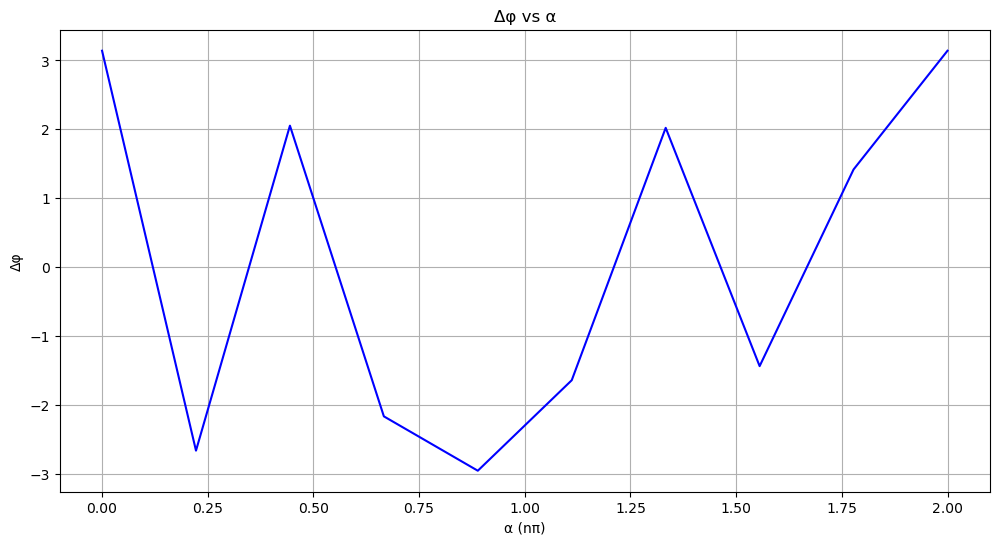

In [ ]:
# Suavizar la curva usando una función Gaussiana
desfases_suavizado = gaussian_filter1d(desfases, sigma=0.01)

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(angles / np.pi, desfases_suavizado, label='Δφ (suavizado)', color='b')
plt.xlabel('α (nπ)')
plt.ylabel('Δφ')
plt.grid(True)
plt.title("Δφ vs α")
plt.show()

In [ ]:
import numpy as np
from scipy.optimize import minimize

def calculator(In, Out, delta, p=False):

    def objective(params):
        alpha = params[0]
        matrix = pi.jones_matrix(delta, alpha)
        result = matrix @ In
        return np.linalg.norm(result - Out)

    initial_guess = [0]
    result = minimize(objective, initial_guess, bounds=[(0, 2*np.pi)])
    alpha = result.x[0]

    if p:
        print(f"delta:{delta}, alpha:{alpha / np.pi:.4f}π")

    return alpha


In [ ]:
In = pi.polarization_basis_set('R')
Out = pi.polarization_basis_set('R')
calculator(In, Out, np.pi/2, p=True)

delta:1.5707963267948966, alpha:0.0000π


0.0